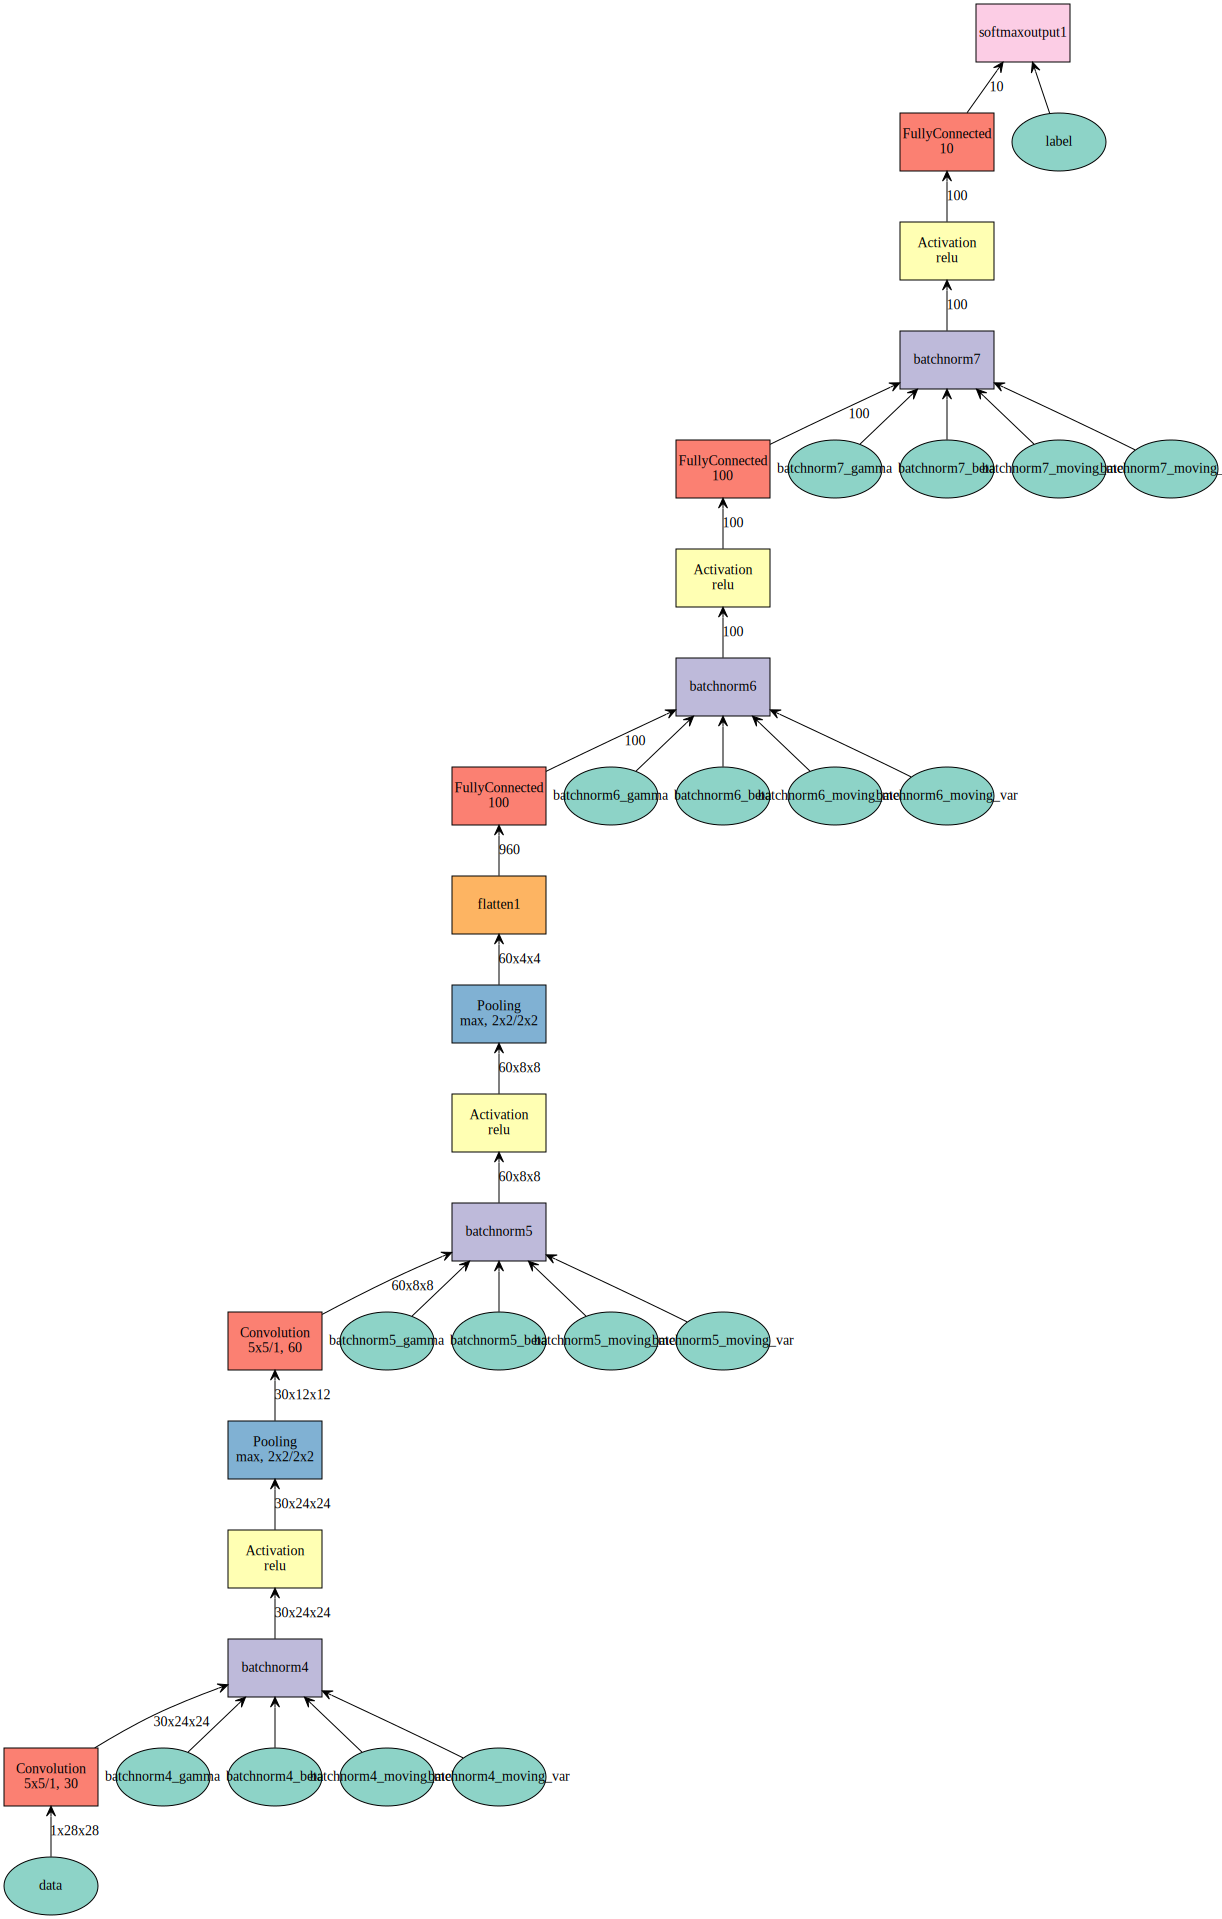

In [3]:
import mxnet as mx

data = mx.sym.Variable('data')
label = mx.sym.Variable('label')

# first convolution layer
conv1 = mx.sym.Convolution(data=data, kernel=(5, 5), num_filter=30)
conv1 = mx.sym.BatchNorm(data=conv1,fix_gamma=False,use_global_stats=True)
relu1 = mx.sym.Activation(data=conv1, name='relu_c1' ,act_type="relu") # -> size : (batch_size,30,24,24)
pool1 = mx.sym.Pooling(data=relu1, pool_type="max", kernel=(2, 2), stride=(2, 2)) # -> size : (batch_size,30,12,12)

# second convolution layer
conv2 = mx.sym.Convolution(data=pool1, kernel=(5, 5), num_filter=60)
conv2 = mx.sym.BatchNorm(data=conv2,fix_gamma=False,use_global_stats=True)
relu2 = mx.sym.Activation(data=conv2, name='relu_c2' ,act_type="relu")# -> size : (batch_size,60,8,8)
pool2 = mx.sym.Pooling(data=relu2, pool_type="max", kernel=(2, 2), stride=(2, 2)) # -> size : (batch_size,60,4,4)

#flatten the data
flatten = mx.sym.Flatten(data=pool2)

# first fullyconnected layer
affine1 = mx.sym.FullyConnected(data=flatten , name='fc1',num_hidden=100)
affine1 = mx.sym.BatchNorm(data= affine1,fix_gamma=False,use_global_stats=True)
hidden1 = mx.sym.Activation(data=affine1, name='relu_f1', act_type="relu")

# two fullyconnected layer
affine2 = mx.sym.FullyConnected(data=hidden1, name='fc2', num_hidden=100)
affine2 = mx.sym.BatchNorm(data= affine2,fix_gamma=False,use_global_stats=True)
hidden2 = mx.sym.Activation(data=affine2, name='relu_f2', act_type="relu")
output_affine = mx.sym.FullyConnected(data=hidden2, name='fc3', num_hidden=10)

output=mx.sym.SoftmaxOutput(data=output_affine,label=label)

# We visualize the network structure with output size (the batch_size is ignored.)
shape = {"data": (100,1,28,28)}
mx.viz.plot_network(symbol=output,shape=shape)#The diagram can be found on the Jupiter noteboo